## Percobaan ke-3: Studi Kasus 3

In [1]:
# test classification dataset
from collections import Counter
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=5, n_classes=3, random_state=1)

# summarize the dataset
print(X.shape, y.shape)
print(Counter(y))

(1000, 10) (1000,)
Counter({1: 334, 2: 334, 0: 332})


<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>🖊️ Analisis :</b> Kode di atas digunakan untuk membuat dataset klasifikasi sintetis dengan 1000 sampel, 10 fitur, dan 3 kelas. Dan distribusi kelas terbagi menjadi 334 untuk tiap kelas. Disini kita dapat memahami struktur dataset klasifikasi dan distribusi kelasnya.
</div>

In [2]:
# define the multinomial logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>🖊️ Analisis :</b> Memanggil fungsi multinomial logistic regression kemudian di fit menggunakan cross-entropy loss dan akan dipredict nilainya untuk tiap label kelasnya. 
</div>

In [3]:
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=5, n_classes=3, random_state=1)
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.681 (0.042)


<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>🖊️ Analisis :</b> Dalam kasus ini kita bisa melihat multinomial logistic regression model dengan penalty default dan didapat dengan mean classification akurasi sekitar 68.1% dari dataset klasifikasi sintetis. Dengan 3 kali perulangan dengan 10 folds, dimana nilai ini adalah nilai default dari repeated stratified k-fold cross-validation, kita bisa mengevaluasi model menggunakan klasifikasi.
</div>

In [4]:
# make a prediction with a multinomial logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model on the whole dataset
model.fit(X, y)
# define a single row of input data
row = [1.89149379, -0.39847585, 1.63856893, 0.01647165, 1.51892395, -3.52651223, 1.80998823, 0.58810926, -0.02542177, -0.52835426]
# predict the class label
yhat = model.predict([row])
# summarize the predicted class
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


In [5]:
# predict probabilities with a multinomial logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model on the whole dataset
model.fit(X, y)
# define a single row of input data
row = [1.89149379, -0.39847585, 1.63856893, 0.01647165, 1.51892395, -3.52651223, 1.80998823, 0.58810926, -0.02542177, -0.52835426]
# predict a multinomial probability distribution
yhat = model.predict_proba([row])
# summarize the predicted probabilities
print('Predicted Probabilities: %s' % yhat[0])

Predicted Probabilities: [0.16470456 0.50297138 0.33232406]


<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>🖊️ Analisis :</b> Disini kemudian memasukkan sebuah satu baris data dummy dengan variable row yang kemudian dilakukan prediksi, didapat bahwa dalam baris tersebut merupakan kelas pertama. Beserta probrabilitas untuk tiap tiap kelasnya.
</div>

In [6]:
# define the multinomial logistic regression model with a default penalty
LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1.0)

LogisticRegression(multi_class='multinomial')

<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>🖊️ Analisis :</b> Selanjutnya dari dataset kemudian dilakukan prediksi dengan solver Limited-memory Broyden-Fletcher-Goldfarb-Shanno untuk optimisasinya.
</div>

<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>🖊️ Analisis :</b> Mari kita lihat dari L2 penalti dengan berat value dari range 0.0001 hingga 1.0. Dengan perhitungan komplex dari multinomial logistic regression di bawah ini.
</div>

In [7]:
# tune regularization for multinomial logistic regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                            n_redundant=5, random_state=1, n_classes=3)
	return X, y

In [8]:
# get a list of models to evaluate
def get_models():
	models = dict()
	for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
		# create name for model
		key = '%.4f' % p
		# turn off penalty in some cases
		if p == 0.0:
			# no penalty in this case
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
		else:
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

>0.0000 0.777 (0.037)
>0.0001 0.683 (0.049)
>0.0010 0.762 (0.044)
>0.0100 0.775 (0.040)
>0.1000 0.774 (0.038)
>1.0000 0.777 (0.037)


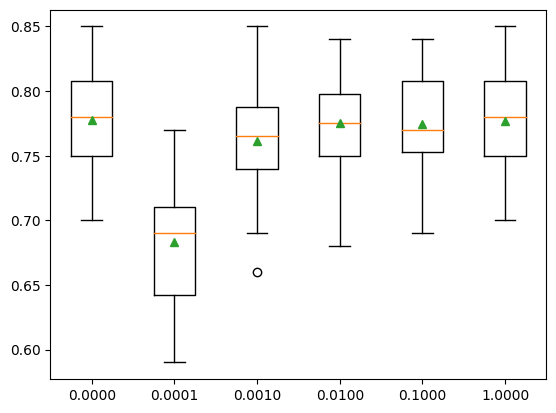

In [9]:
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the scores
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize progress along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Box and Whisker Plots of L2 Penalty Configuration vs. Accuracy for Multinomial Logistic Regression

<div style="border-radius: 10px; border: #0ea5e9 solid; padding: 15px; background-color: #ffffff00; font-size: 100%; text-align: left;">
    <b>🖊️ Analisis :</b> Kode di atas memungkinkan ntuk membandingkan kinerja model regresi logistik dengan berbagai tingkat regularisasi. Dari gambar box plot di atas untuk akurasi skor dari tiap tiap konfigurasi dan kita dapat memahami bagaimana performa model berubah dengan perubahan parameter regularisasi. Dalam kasus ini C Value dari 0.1 memiliki skor terbaik dengan sekitar 77.7%. Yang skornya sama dengan yang tanpa penalti.
</div>